# Part I - (Prosper Loan Dataset)
## by (Rita Chukwuma)

## Introduction

> The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate, borrower income, current loan status etc, from the year 2009-2014.

> The dataset is subdivided into two main categories:

> The borrower information: Basic attributes of the borrowers such as stated monthly income, income range,  employment status, interest rate, loan status, Bank card Utilization etc. The Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper Rating and Estimated Returns, Prosper Score etc.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import HTML, display
%matplotlib inline



> Loading dataset and describing its properties.


In [3]:
# read dataset and display it contents
ploan = pd.read_csv('prosper_loan_data.csv')
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
ploan.shape

(113937, 81)

In [5]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
ploan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# Subseting the dataframe by selecting features of interest
cols = ['EstimatedReturn', 'LoanOriginalAmount', 'ProsperScore', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
ploan_int = ploan[cols]

In [8]:
ploan_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
EstimatedReturn          84853 non-null float64
LoanOriginalAmount       113937 non-null int64
ProsperScore             84853 non-null float64
BorrowerAPR              113912 non-null float64
StatedMonthlyIncome      113937 non-null float64
Term                     113937 non-null int64
ProsperRating (Alpha)    84853 non-null object
EmploymentStatus         111682 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 7.0+ MB


In [9]:
ploan_int.describe()

,EstimatedReturn,LoanOriginalAmount,ProsperScore,BorrowerAPR,StatedMonthlyIncome,Term
count,84853.000000,113937.00000,84853.000000,113912.000000,1.139370e+05,113937.000000
mean,0.096068,8337.01385,5.950067,0.218828,5.608026e+03,40.830248
std,0.030403,6245.80058,2.376501,0.080364,7.478497e+03,10.436212
min,-0.182700,1000.00000,1.000000,0.006530,0.000000e+00,12.000000
25%,0.074080,4000.00000,4.000000,0.156290,3.200333e+03,36.000000
50%,0.091700,6500.00000,6.000000,0.209760,4.666667e+03,36.000000
75%,0.116600,12000.00000,8.000000,0.283810,6.825000e+03,36.000000
max,0.283700,35000.00000,11.000000,0.512290,1.750003e+06,60.000000


### What is the structure of your dataset?

> The dataset contains both categorical and numeric data with 113,937 rows, 81 columns.

### What is/are the main feature(s) of interest in your dataset?

 > I am interested in 

> What factors affect investors returns.

> Finding out the factors that affects the borrowers APR.

> Also finding out whether the actual loan performance really meets the estimated loan performance expectation.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To find out factors that affects borrowers APR and investor return we will be using these data: LoanOriginalAmount, ProsperScore, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus
> While Loan performance can be calculated using the ActualReturn and the EstimatedReturn

## Univariate Exploration

> In this section, we will explore our data using univariate exploration to answer the questions above.


In [10]:
def plot_hist(dataframe,column_name,bin_stip):
    bins=np.arange(dataframe[column_name].min(),dataframe[column_name].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataframe,x=column_name,bins=bins);
    return(plot)

In [90]:
# drop null rows without an estimated return
ploan_int.EstimatedReturn.dropna(axis = 0, inplace = True)

### Estimated Returns

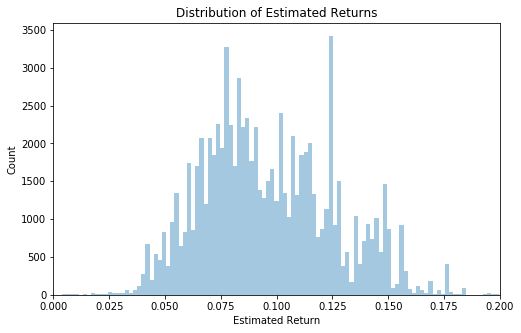

In [93]:
display(HTML('Lets look at the loan estemated returns:'))
# plot the distribution of estimated returns in histogram
plt.figure(figsize = [8,5])
sb.distplot(ploan_int.EstimatedReturn, kde = False, bins = 250)
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Returns');

##### Our plot  appears to be correct as the distribution is right skewed. It also looks like there are some peaks  at 5%, 7.5%, 8.0%, 0.1%, and 12.5%. Mostly the largest bin falls right around 12.5%.
##### Let's try to calculate the actual returns and see how they compare to the estimated returns.

### Actual Returns

>To calculate the actual returns required a bit of feature engineering. We can calculate the actual returns by using the remaining loan performance (LP) variables.
We calculated Historical Return for loans originated through Prsoper as follows: ...(a) the sum of the Interest Paid, plus Late Fees, minus Servicing Fees, minus Collection Fees, in each case on active loans, plus Net Recoveries on charged-off or defaulted loans, plus Net Debt Sale Proceeds on sold loans, minus Gross Principal Losses; divided by (b) the sum of the Principal Balances Outstanding on active loans at the end of each day since origination. We then annualize the result to get the “Historical Return” for the Group.*

In [13]:
# Formular to calculate the actual return 
ploan['ActualReturns'] = ploan.LP_CustomerPayments - ploan.LoanOriginalAmount - (ploan.LP_ServiceFees + ploan.LP_CollectionFees + ploan.LP_NetPrincipalLoss)
ploan['ActualReturns'] = 1 + (ploan.ActualReturns / ploan.LoanOriginalAmount)

In [14]:
ploan.ActualReturns.describe()

count    113937.000000
mean          0.531620
std           0.621164
min          -1.000650
25%           0.074989
50%           0.415864
75%           1.119834
max           2.602880
Name: ActualReturns, dtype: float64

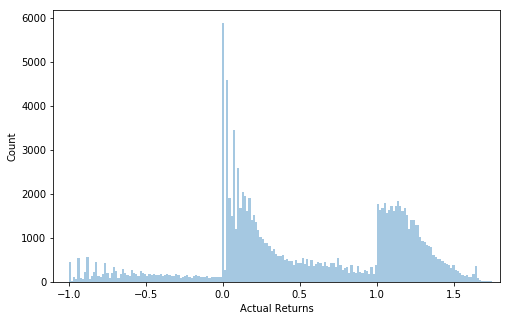

In [94]:
# plot distribution
plt.figure(figsize = [8,5])
sb.distplot(ploan.ActualReturns, kde = False, bins = 250)
plt.xlim(-1.1, 1.8)
plt.xlabel('Actual Returns')
plt.ylabel('Count');

#####  The wide range of values for actual returns looks really interesting. even though this chart is not acurate to compare to Estimated Returns which is annualised based on the length of the loan. Most loans where not paid at 0.0. which means ivestors loosing money. On the other end of the spectrum, it looks like most loans drop off after about 165% of the original loan amount.


### Prosper Score 

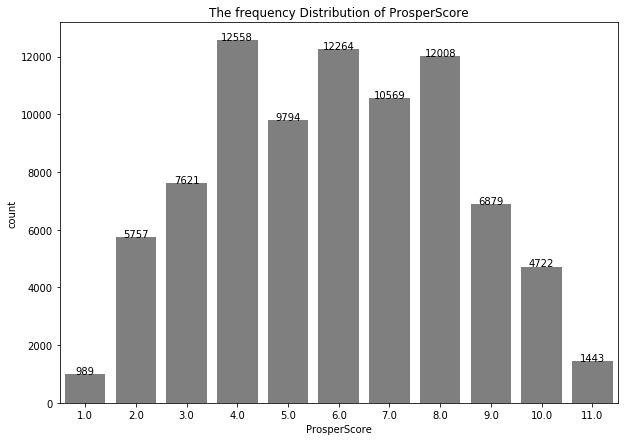

In [88]:
colorChoice = sb.color_palette()[7]

plt.figure(figsize=[10, 7]);
sb.countplot(data = ploan_int, x = 'ProsperScore', color = colorChoice);
plt.title('The frequency Distribution of ProsperScore');

locs, labels = plt.xticks()
cat_counts = ploan_int['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

#### This plot show that 4.0 seems to be the one with highest score of 112595

### Loan Original Amount

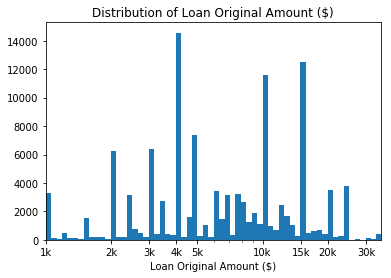

In [95]:
display(HTML('Lets check the distribution of the original loan:'))
# plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(ploan_int['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = ploan_int, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

#### All the major spikes in frequency occure at 4K, 10K, and 15K. It seems that these three loan sizes are the most common ones borrower usually go for.

### Borrowers APR

In [18]:
ploan_int.BorrowerAPR.dropna(axis = 0, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


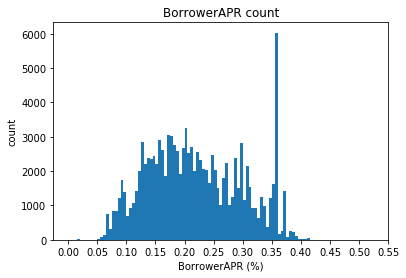

In [19]:
display(HTML('This is to display the Borrowers loan interest rate:'))
bins = np.arange(0, ploan_int['BorrowerAPR'].max(), 0.005)
plt.hist(data = ploan_int, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, ploan_int['BorrowerAPR'].max()+0.05, 0.05));

#### Here we have a normal distribution with a peak at around 0.2 and an exceptional high counts between 0.35% and 0.358%. The plot looks not too skewed.

### State Monthly Income

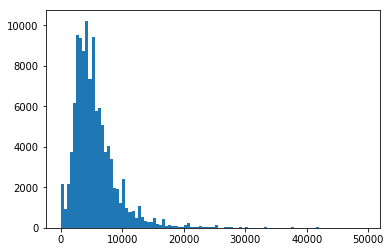

In [20]:
display(HTML('Lets look at the distribution of stated monthly income:'))
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = ploan_int, x = 'StatedMonthlyIncome', bins=bins_smi);

#### The distribution of stated monthly income is severely right screwed, with few are ridiculously higher than 100k and majority of the stated monthly income are less than 30k. 

In [21]:
# Let's get the percentage of borrowers whose stated monthly income is greater than 30k
(ploan_int.StatedMonthlyIncome>30000).sum()/float(ploan_int.shape[0])

0.0028700071091919219

##### This shows that less than 0.003 percent borrowers have stated monthly income greater than 30k, these can be seen as outlier during exploration, so we have to drop them.

In [22]:
# Drop the outliers, the stated monthly income that are greater than 30k.
ploan_int = ploan_int[ploan_int.StatedMonthlyIncome<=30000]
# print stated monthly income greater than 30k
(ploan_int.StatedMonthlyIncome>30000).sum()

0

### Loan Term

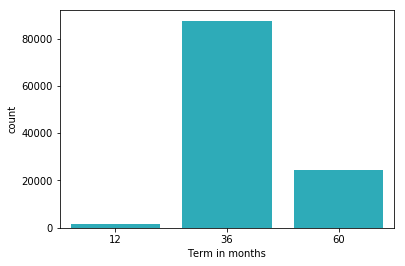

In [80]:
display(HTML('Lets look at the distribution of loan term in months:'))
color_base=sb.color_palette()[9]
# Plot term of loans
sb.countplot(data=ploan_int, x='Term', color=color_base)
plt.xlabel('Term in months');

#### The shortest  loan term here is 12 months, the medium term loans being 3 years while the longest term is 5 years. The most common loan term is a 3 year loan medium term, followed by 5 year loan term. The short term loan is very uncommon .

### Prosper Loan Rating

In [24]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
ploan_int['ProsperRating'] = ploan_int['ProsperRating (Alpha)'].astype(ordered_var)

In [25]:
# Print the proportion below the bars 
n_loans=ploan['LoanStatus'].value_counts().sum()
status_count=ploan['LoanStatus'].value_counts()
status_order=status_count.index

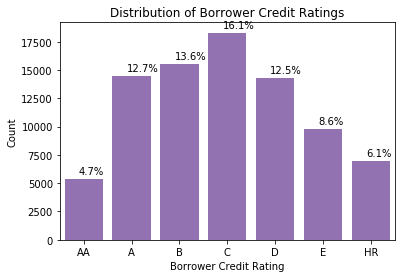

In [76]:
#Plot ordinal variable distribution 'ProsperRating'
sb.countplot(data = ploan_int, x = 'ProsperRating', color = color_base)
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');
rating_counts = ploan_int['ProsperRating'].value_counts()
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

#### Note that the highest rating frequency occured at C Prosper Rating (which is around 16.1% of the total number of ratings) and the lowest rating is at AA rounding (4.7%).

### Employment Status

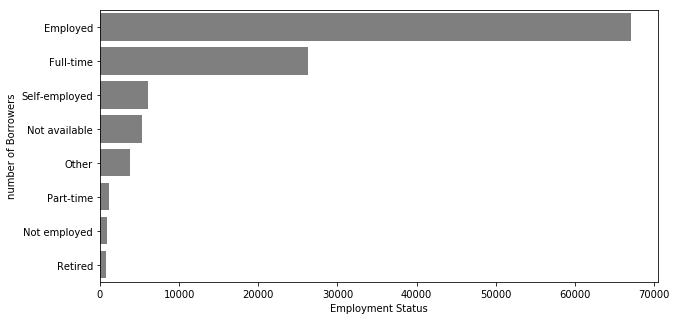

In [71]:
display(HTML('Lets look at the numbers of borrowers by Employment Status:'))
# Plot for EmploymentStatus
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[7]
# Order the categorical variable type
cat_order = ploan_int['EmploymentStatus'].value_counts().index

sb.countplot(data = ploan_int, y = 'EmploymentStatus', color = base_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('number of Borrowers');

#### This plot shows that the majority of borrowers are employed, which means those on other employment status may not get a loan offer from prosper.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the analysis of our variables of interest, we looked into the prosper loan EstimatedReturn, LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and actual returns of the dataset.

> We saw relatively normal distributions for estimated return, loan original amount, Borrowers APR, state monthly income, terms, prosper ratings, and employment status. However, trying to calculate the actual returns proved to be difficult. We may need more information about the dataset on some variable if need arises.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The estimated returns and borrowers APR have some null values which prevented them from being ploted on histogram but I had to drop the null values for a successful plots.
> I ploted the loan original amount against a log scale because it has a long tail.
> The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but few of them are ridiculously high, like greater than 100k so I had to drop the outliers. 

## Bivariate Exploration

> Here we will be exploring all variables of interest and more by pairing them to answer our investigation questions.

In [28]:
# Finding correlations among the numerical variables.
catg_vars = ['ProsperRating', 'Term', 'EmploymentStatus']
numb_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'EstimatedReturn', 'ProsperScore', 'ActualReturns', 'StatedMonthlyIncome']


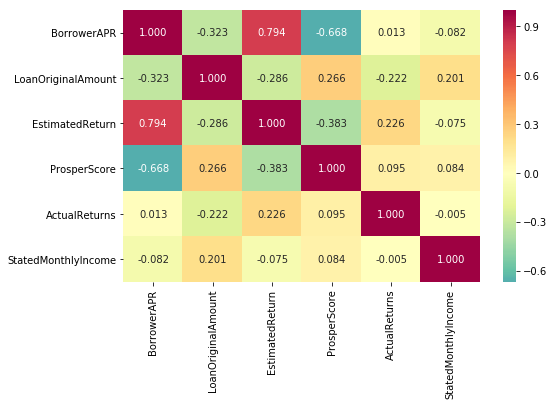

In [70]:
# correlation plot of Borrowers APR with numerical variables.
plt.figure(figsize = [8, 5])
sb.heatmap(ploan[numb_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Spectral_r', center = 0);

#### The borrower APR and loan original amount  variables are negatively correlated. While the borrower APR is positively correlated with Estimated returns and Actual returns. The loan original amount is positively correlated with the stated monthly income and prosper score, it makes sense since borrowers with more monthly income could loan more money with better credit score.

#### Plot numerical variables against categorical variables 

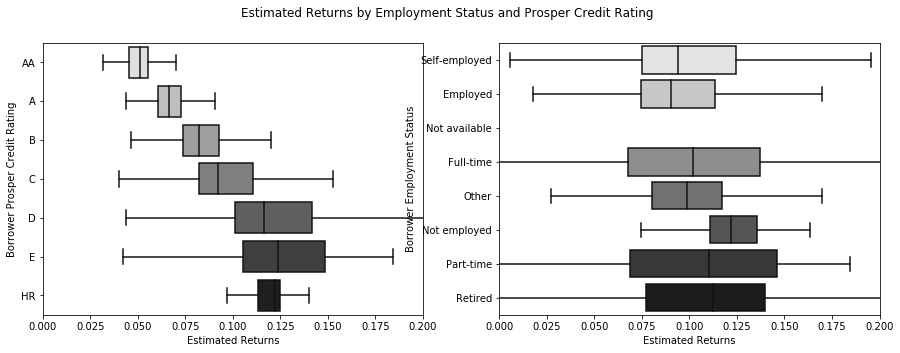

In [68]:
# boxplots to find out how prosper credit rating and emploment status correlation to investors estimated returns 
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = ploan_int, y = 'ProsperRating', x = 'EstimatedReturn', palette = "gray_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Prosper Credit Rating')
plt.xlabel('Estimated Returns')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = ploan_int, y = 'EmploymentStatus', x = 'EstimatedReturn', palette = "gray_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Employment Status')
plt.xlabel('Estimated Returns')

plt.suptitle('Estimated Returns by Employment Status and Prosper Credit Rating');

##### This plot show that the higher the credit rating the higher the investors estimated returns while on the other variable, it shows that borrowers without source of income tends to give better returns than the rest, which is ridiculous.

#### Plot categorical variable against each other

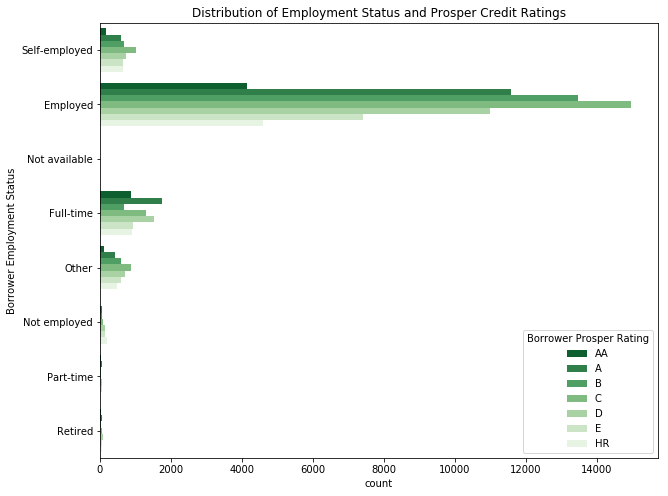

In [65]:
# clustered bar chart to find a relationship between two categorical variables.
plt.figure(figsize = [10,8])

ax = sb.countplot(data = ploan_int, y = 'EmploymentStatus', hue = 'ProsperRating',
                   palette = 'Greens_r')

ax.legend(title = 'Borrower Prosper Rating')
plt.title('Distribution of Employment Status and Prosper Credit Ratings')
plt.ylabel('Borrower Employment Status');

##### This plot show that borrowers with higher credit rating has jobs, this makes sense because borrower with employment got money to pay their loans faster or rather got money to lend.

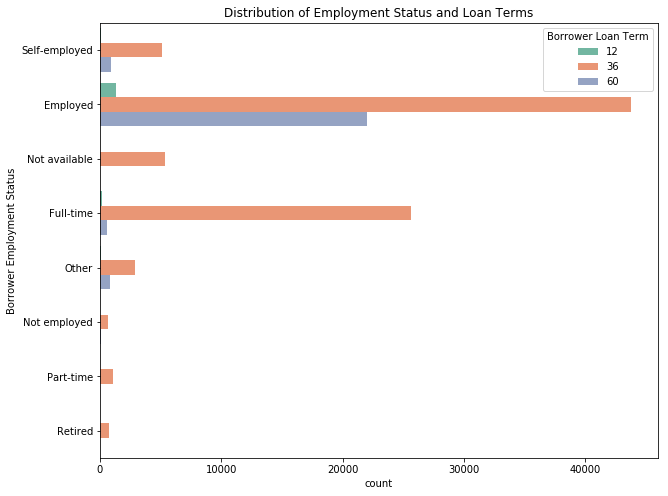

In [57]:
# Lets see how employment status correlates with loan terms.
plt.figure(figsize = [10,8])

ax = sb.countplot(data = ploan_int, y = 'EmploymentStatus', hue = 'Term',
                   palette = 'Set2')

ax.legend(title = 'Borrower Loan Term')
plt.title('Distribution of Employment Status and Loan Terms')
plt.ylabel('Borrower Employment Status');

##### This plot shows that employed borrowers takes most loans with medium term followed by the long term and they also take most loans with shortest term

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First, I observed the borrower APR is negatively correlated with the loan original amount, which means, the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The stated monthly income also has a strong effect on the borrower APR, which decreases with an increase in income. 
From our box plots, I discovered a trend of median estimated returns decrease as the borrowers employment status increased. This makes sense as borrowers with a higher income can demand the most competetive rates from creditors. The trend between credit rating and estimated returns shows that the higher the credit rating the higher the investors estimated returns while on the other variable, it shows that borrowers without source of income tends to give better returns than the rest, which is ridiculous.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> interestingly, the stated monthly income is positively correlated with loan original amount, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and are employed .

## Multivariate Exploration

> Creating plots of three or more variables to investigate our data even
further.

#### The relationship of Borrower APR across prosper rating and loan term

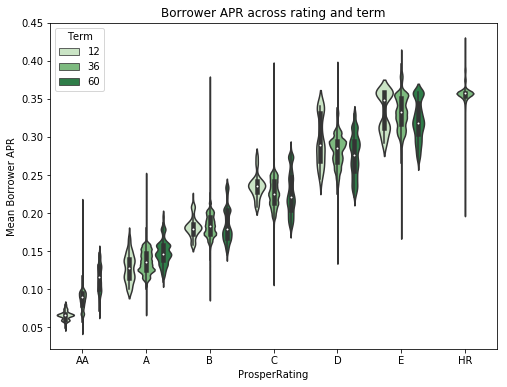

In [45]:
fig = plt.figure(figsize = [8,6])
ax = sb.violinplot(data = ploan_int, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

##### As seen on the plot, there is a decrease in  borrower APR with an increase in loan term and borrower's credit rating.

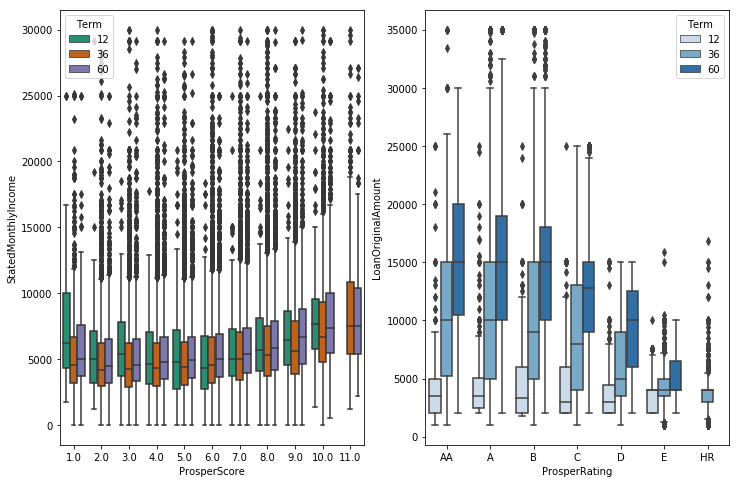

In [96]:
# Lets Check the credit rating and loan term effects on stated monthly income and loan original amount variables
fig, ax = plt.subplots(ncols=2, figsize=[12,8])
sb.boxplot(data = ploan_int, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Dark2', dodge = 0.4, ax=ax[0])
sb.boxplot(data = ploan_int, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', dodge = 0.4, ax=ax[1]);

##### The plot shows that there is a trend between term and rating, this means, with better Prosper rating, the loan amount of all three terms increases. We can also observe that the higher the  loan amount , the longer the loan term. For stated monthly income, it seem like there is a better correlation between term and prosper score than rating. it looks like there is both increases and decrease in loan term with an increase in stated monthly income and prosper score.

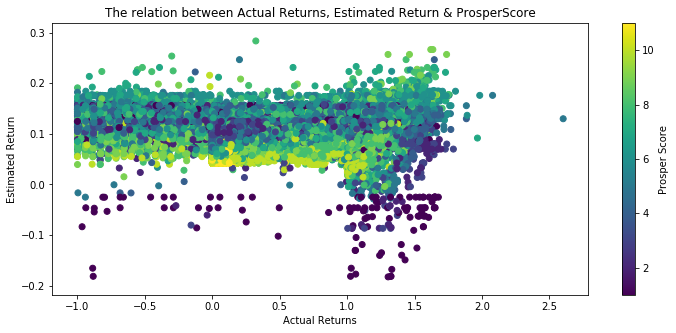

In [46]:
# The relation between Stated Monthly Income, Loan Original Amount & Term
plt.figure(figsize=[12,5])
plt.scatter(data=ploan,x="ActualReturns",y = "EstimatedReturn",c="ProsperScore")
plt.xlabel("Actual Returns")
plt.ylabel("Estimated Return");
plt.title("The relation between Actual Returns, Estimated Return & ProsperScore");
plt.colorbar(label="Prosper Score");


##### This is another interesting plot, here prosper score has a negative corelation with Estimated Return but positively correlated with Actual Returns. which mean the higher the Actual returns the higher the credit score which is a reverse order with Estimated Return.

#### The relation between Borrower APR, Estimated Return & Prosper Rating.

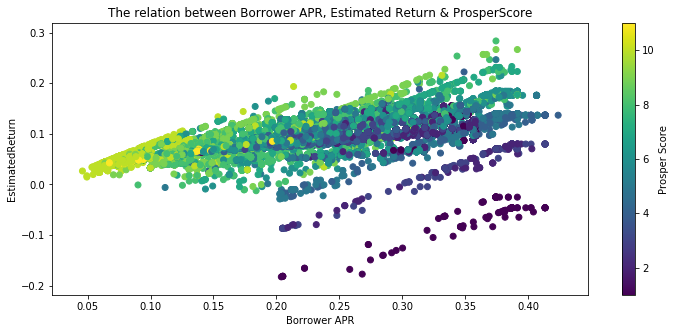

In [47]:
plt.figure(figsize=[12,5])
plt.scatter(data=ploan_int,x="BorrowerAPR",y = "EstimatedReturn",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("EstimatedReturn");
plt.title("The relation between Borrower APR, Estimated Return & ProsperScore");
plt.colorbar(label="Prosper Score");

##### This graph shows that the loans with higher Borrower APR and Estimated Return had a lower prosper score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here I explored borrower APR against loan amount by looking at the impact of Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for borrowers with B-AA ratings, the APR increase with the loan term.

## Conclusions
>
> In this dataset investigation, we are trying to find out the:

> 1.	The key factors that influence the borrowers APR and investor return.
> 2.	Also, we want to find out the loan performance.

> While exploring the data, I discovered that to measure the loan performance that some feature engineering has to be done on the data in other to calculate the Actual Returns using Prosper's Net Annualized formula. However, we discovered that the actual returns isn’t annualized due to the dependent variable so we couldn’t get an accurate calculation.
The bivariate exploration revealed first, the borrower APR is negatively correlated with the loan original amount, which means, the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The stated monthly income also has a strong effect on the borrower APR, which decreases with an increase in income. From our box plots, I discovered a trend of median estimated returns decrease as the borrowers employment status increased. This makes sense as borrowers with a higher income can demand the most competitive rates from creditors. The trend between credit rating and estimated returns shows that the higher the credit rating the higher the investors estimated returns while on the other variable, it shows that borrowers without source of income tends to give better returns than the rest, which is ridiculous. However I noticed that borrowers with higher monthly incomes often received better credit ratings and score.
The multivariate exploration revealed again that the credit rating and score happens to be the best primary predictor for estimated returns. 
Also, we can say that increase in both loan amount and monthly income decreases the borrower APR.
